# TRANSFER LEARNING MODEL for IMAGE CLASSIFICATION on MENDELEY DATASET

## The objective is to classify Indian Medicinal leaf images into 26 classes using ResNet50 architecture.

### Importing required libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Making Directories for train validation and test data


In [2]:
import splitfolders
import os

#os.makedirs('output')
#os.makedirs('output/train')
#os.makedirs('output/val')
#os.makedirs('output/test_set')

### Splitting data in defined ratio

In [3]:
image_loc = 'D:\Medicinal Leaf Dataset'

splitfolders.ratio(image_loc, output='output', seed=1337, ratio=(0.8,0.1,0.1))

Copying files: 1615 files [00:11, 143.60 files/s]


### Defining Image size as (224,224)

In [4]:
IMAGE_SIZE = [224,224]

train_path = 'output\\train'
validation_path = 'output\\test'

### Calling Model and defining input as image size and "[3]" for RGB channel, assigning weights as it is

In [5]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### As  the generalized resNet50 model is the objective, layers are not trained explicitly

In [7]:
for layer in resnet.layers:
    layer.trainable = False       #we are reusing previous layers and not retraining them
    

In [8]:
folders = glob('D:\Medicinal Leaf Dataset\*')

In [9]:
len(folders)

28

### Flattening for better computation

In [10]:
x = Flatten()(resnet.output)

### Defining custom output layer with softmax as the activation function because resNet50 has a output layer of 1000 outputs, in our case there are 26 classes.

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = resnet.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Compiling model with given parametres

In [13]:
model.compile(
loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

### Using Data Augmentation for adding variation in training data and scaling the images

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataGen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataGen  = ImageDataGenerator(rescale = 1./255)

### Giving training and validation path and defining target size, batch size and categorical class mode

In [15]:
training_set = train_dataGen.flow_from_directory('output\\train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 1360 images belonging to 26 classes.


In [16]:
val_set = train_dataGen.flow_from_directory('output\\val',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 333 images belonging to 26 classes.


### Fitting the model

In [22]:
r = model.fit_generator(
training_set,
validation_data = val_set,epochs = 50,
steps_per_epoch = len(training_set),
validation_steps = len(val_set)
)

<ipython-input-22-5c48062396c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
43/43 [==============================] - 187s 4s/step - loss: 10.1306 - accuracy: 0.1404 - val_loss: 3.2865 - val_accuracy: 0.4324
Epoch 2/50
43/43 [==============================] - 162s 4s/step - loss: 3.1875 - accuracy: 0.3404 - val_loss: 3.2066 - val_accuracy: 0.4444
Epoch 3/50
43/43 [==============================] - 166s 4s/step - loss: 2.7523 - accuracy: 0.4206 - val_loss: 2.3027 - val_accuracy: 0.3994
Epoch 4/50
43/43 [==============================] - 161s 4s/step - loss: 2.4711 - accuracy: 0.4088 - val_loss: 2.6583 - val_accuracy: 0.4535
Epoch 5/50
43/43 [==============================] - 163s 4s/step - loss: 2.0714 - accuracy: 0.5000 - val_loss: 1.8952 - val_accuracy: 0.5435
Epoch 6/50
43/43 [==============================] - 163s 4s/step - loss: 2.0992 - accuracy: 0.5074 - val_loss: 1.4812 - val_accuracy: 0.6126
Epoch 7/50
43/43 [==============================] - 163s 4s/step - loss: 1.7183 - accuracy: 0.5846 - val_loss: 1.9364 - val_accuracy: 0.5916
Epoch 8/50
4

### Plotting losses and accuracy

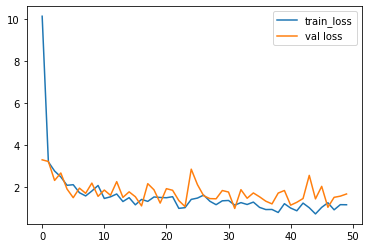

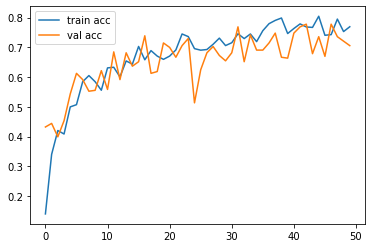

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving the training in H5 file

In [26]:
from tensorflow.keras.models import load_model

model.save('Leaves2.resnet50.h5')

In [25]:
from tensorflow.keras.preprocessing import image

### Defining test set

In [17]:
t_set = test_dataGen.flow_from_directory('output\\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )


Found 181 images belonging to 26 classes.


### Predicting on test data

In [19]:
y_pred = model.predict(t_set)

In [20]:
y_pred

array([[2.0254578e-18, 1.7479815e-05, 6.2903547e-01, ..., 3.4710422e-01,
        1.2205362e-02, 7.2994226e-07],
       [1.9112333e-18, 2.1653898e-06, 1.4127198e-09, ..., 6.2516997e-10,
        1.2262591e-06, 6.8260675e-08],
       [2.1397434e-16, 8.3625549e-03, 1.3684283e-04, ..., 9.1207592e-05,
        1.3024509e-03, 3.3060700e-04],
       ...,
       [2.0304381e-20, 1.8798989e-08, 1.0323206e-11, ..., 1.7867843e-12,
        5.5624098e-13, 1.0900847e-13],
       [6.0142109e-13, 1.7917897e-12, 1.1412687e-19, ..., 7.2038344e-25,
        3.6771850e-13, 3.3845260e-21],
       [8.5796340e-15, 8.3149648e-01, 7.8640221e-07, ..., 3.6373325e-07,
        5.3341468e-05, 2.8555037e-03]], dtype=float32)

### Taking in class with max probability

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [22]:
y_pred

array([ 2, 14,  7, 19, 24, 18, 14, 22, 18, 17, 20,  7, 17, 24, 22,  9, 19,
       14, 19, 24, 12, 14,  2,  7, 12,  3,  6, 14, 23, 14, 10,  7,  4, 14,
       24,  7,  9, 24, 22,  0,  6,  1,  1, 18, 23,  3, 23,  7, 20,  5,  5,
        5,  8, 10, 13, 20, 14, 14, 13, 23,  7, 22, 20, 13, 20,  8,  8, 22,
       19,  4, 12, 22, 22, 24, 14, 14,  4, 14, 19,  8,  9,  2,  7,  2,  2,
       12, 24,  1, 18, 12,  9,  1,  4,  9, 19,  7, 13,  3, 12, 18, 10, 23,
       22,  0, 14,  1, 12,  6,  2,  2,  4, 14,  7,  1,  1, 17, 23, 24, 13,
       14, 23,  9,  0,  4,  7, 14, 20,  7, 22, 19,  0,  5, 19, 11,  8, 13,
        1, 14, 12, 10,  6, 14, 12, 24, 10, 13, 24,  7,  7,  7,  8, 11,  1,
        6,  7,  7, 20, 19, 22, 22,  7, 12, 12,  4, 18, 11, 13,  7,  7, 19,
        3,  6,  4, 17,  9, 17, 24,  9,  4, 12,  1], dtype=int64)

In [18]:
from keras.models import load_model
model = load_model('Leaves2.resnet50.h5')

### Adjustments for systematic output

In [23]:
files = glob('output\\train\\*')

In [24]:
files = list(map(lambda x: x.replace('output\\train\\',''),files))


In [25]:
files

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)']

In [26]:
name_id_map = { i : files[i] for i in range(0, len(files) ) }

In [27]:
name_id_map

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)'}

In [28]:
y_pred

array([ 2, 14,  7, 19, 24, 18, 14, 22, 18, 17, 20,  7, 17, 24, 22,  9, 19,
       14, 19, 24, 12, 14,  2,  7, 12,  3,  6, 14, 23, 14, 10,  7,  4, 14,
       24,  7,  9, 24, 22,  0,  6,  1,  1, 18, 23,  3, 23,  7, 20,  5,  5,
        5,  8, 10, 13, 20, 14, 14, 13, 23,  7, 22, 20, 13, 20,  8,  8, 22,
       19,  4, 12, 22, 22, 24, 14, 14,  4, 14, 19,  8,  9,  2,  7,  2,  2,
       12, 24,  1, 18, 12,  9,  1,  4,  9, 19,  7, 13,  3, 12, 18, 10, 23,
       22,  0, 14,  1, 12,  6,  2,  2,  4, 14,  7,  1,  1, 17, 23, 24, 13,
       14, 23,  9,  0,  4,  7, 14, 20,  7, 22, 19,  0,  5, 19, 11,  8, 13,
        1, 14, 12, 10,  6, 14, 12, 24, 10, 13, 24,  7,  7,  7,  8, 11,  1,
        6,  7,  7, 20, 19, 22, 22,  7, 12, 12,  4, 18, 11, 13,  7,  7, 19,
        3,  6,  4, 17,  9, 17, 24,  9,  4, 12,  1], dtype=int64)

### Mapping the output indices to class names

In [29]:
predicted_classes = list(map(name_id_map.get, y_pred))

In [30]:
predicted_classes

['Artocarpus Heterophyllus (Jackfruit)',
 'Moringa Oleifera (Drumstick)',
 'Citrus Limon (Lemon)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Punica Granatum (Pomegranate)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Moringa Oleifera (Drumstick)',
 'Pongamia Pinnata (Indian Beech)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Nerium Oleander (Oleander)',
 'Piper Betle (Betel)',
 'Citrus Limon (Lemon)',
 'Nerium Oleander (Oleander)',
 'Punica Granatum (Pomegranate)',
 'Pongamia Pinnata (Indian Beech)',
 'Ficus Religiosa (Peepal Tree)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Moringa Oleifera (Drumstick)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Punica Granatum (Pomegranate)',
 'Mangifera Indica (Mango)',
 'Moringa Oleifera (Drumstick)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Citrus Limon (Lemon)',
 'Mangifera Indica (Mango)',
 'Azadirachta Indica (Neem)',
 'Carissa Carandas (Karanda)',
 'Moringa Oleifera (Drumstick)',
 'Psidium Guajava (Guava)',
 'Moringa Oleifera (Drumstick)',
 'Hibiscus Rosa-sinensis',
 'Ci

### Evaluating accuracy

In [31]:
loss, accuracy = model.evaluate(t_set, verbose=2)


6/6 - 11s - loss: 1.9163 - accuracy: 0.6796 - 11s/epoch - 2s/step


In [32]:
print(f"accuracy on test data is : {round(accuracy*100)} %")

accuracy on test data is : 68 %
